<a href="https://colab.research.google.com/github/kumarjitpathakbangalore/Data-Science-from-Scratch/blob/master/Transaction_data_preparation_final_KP_JK_VV__dynamic_reference_frame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A journey from POS data to usable features for any classification modelling 

## What are we going to cover here?

Note: We took an example dataset from ecommerce transaction data from kaggle to do our experimentation

Hello readers, It's been some time since  posted my last bolg on neural network. 

After spending 14 years on the field of data science(predictive modelling. I realized that many of the **budding data scienitst** have great difficulty in understanding data before applying any machine learning techniques or mathing the coding skills of a core programmer. 

I intend to build this **notebook with step by step execution** so that a budding data scientist can cee and feel what is happening in each step of the program before executing the same at the same time realize the vaue of understanding the data in detail.

This notebook is for budding data scientists not for the expert programmers. 

This notebook is a joint effort of **three partners colaboration (Jitin Kapila, Vinoth Venkatraman, and myself- Kumarjit Pathak)**. without all three of us coming togeather it may not have been possible to achieve this during COVID crisis period where we all are trying to save our job amidst great uncertainity.


However there is a bigger responsibility of sharing while learning and hence continuing our effort. Hope you like it.

We are going to use google colab for this excercise. Whoever wants to know more about how to use google colab you can follow the below link:

https://medium.com/@kumarjitpathak/how-to-use-colab-for-data-science-experimentation-6859553c82da


### We want to cover the following in this notebook


> ## Data Understanding using transactional data

*   **Understanding data issues**
*   **Understanding date operation**
*   **Dynamic subsetting of data** 
*   **Using if statement, for loop, list comprehension in a dataframe for analysis**
*   **Data cleaning based on multiple condition**
*   **Recoding of values in a dataframe based on condition** 
*   etc....



> ## Exploratory data analysis


*   **Univariate Study of variables**
*   **Feature extraction from different variable**
*   **Cross-tabulation**


> ## Building ABT(Analytical Base Table)


*   **Aggregating data at different level to build ABT**
*   **How to dynamically recode column names using raval**



> ### Introduction of dynamic reference frame method for ABT creation for futuristic classification (classifying what may happen in future)

This is a concept which is not widely known in data science world. Let us introduce our paper on the same. 
https://scirate.com/arxiv/1805.10168



**We shall cover the modelling part of it in our upcoming blogs: stay tuned**















In [1]:
# If you want to directly fetch any data from kaggle you need to download kaggle.jason once yu login in kaggle. 
#This will help colab to connec to the required dataset based on your own authentication


from google.colab import files
files.upload()

# it would prompt for a jason file upload. Please go to your computer and select the kaggle Jason and it would autometically upload.



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kumarjitpathak","key":"862e983e01ae8b21ddc280e38eb3eed6"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Apr 11 04:04 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

### Now we have successfuly setup the kaggle API . It's time to data download directly from kaggle

In [0]:
!kaggle datasets download -d carrie1/ecommerce-data

 69% 5.00M/7.20M [00:00<00:00, 12.6MB/s]
100% 7.20M/7.20M [00:00<00:00, 16.2MB/s]


### Do we know where is the file currently located?

In [0]:
!ls /content/

ecommerce-data.zip  kaggle.json  sample_data


### Data above in zip format, We might need to unzip the same.



In [0]:
!sudo apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
!unzip ecommerce-data.zip

Archive:  ecommerce-data.zip
  inflating: data.csv                


### Before going ahead and loading this file using pandas. Let's do litte check of our environment. These are codes just good to know not essential

In [0]:
!cat /proc/cpuinfo
!cat /proc/meminfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs itlb_multihit
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management

In [0]:
# Check GPU specification
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11879623607362747225, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7308560481223555769
 physical_device_desc: "device: XLA_CPU device"]

### Let's now start working on the data and load the same in pandas. 

In [0]:
import pandas as pd
import numpy as np

In [0]:
ecomdata= pd.read_csv('data.csv', delimiter = ',',encoding= 'unicode_escape')

In [0]:
ecomdata.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


#### Let's see what is the current data types and details of the file loaded

In [0]:
ecomdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [0]:
ecomdata.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

#### Checking some priliminary matters:

*   Shape of the files , Understand the size of the file dimention
*   Basic descriptive , is there any extreme value?
*   Is there any missing value?



In [0]:
ecomdata.shape

(541909, 8)

In [0]:
ecomdata.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [0]:
ecomdata.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Our observation above:


*   Date is currently in Object format and hence the operation might be difficult
*   There are extreme values both on positive side and negative side
*   There are missing values in Description and Customer ID columns 
*   Columns has capital and small letter as well - sometimes inconvenient for programming 

Note: Description can be filled based on Unique stock code vs description lookup, but customer ID is a basic beed of the data and hence it is better to drop the data lines which has NULL customer IDs



### Let's first do date operation

In [0]:
# Let's start with Date operations. Let's see what are the options it provides
help(pd.datetime)

Help on class __DatetimeSub in module pandas:

class __DatetimeSub(builtins.object)
 |  Methods defined here:
 |  
 |  emit_warning(dummy=0)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(cls, *args, **kwargs)
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



/usr/lib/python3.6/inspect.py:441: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  srch_obj = srch_cls.__getattr__(cls, name)
/usr/lib/python3.6/pydoc.py:220: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  fields = getattr(object, '_fields', [])


In [0]:
# Date Operation- Converting the Invoice date to DATE

ecomdata["InvoiceDate"]= pd.to_datetime(ecomdata.InvoiceDate)

In [0]:
ecomdata.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

after coverting date time we can explore all the options to extract all info using below code +TAB

CODE:
ecomdata.InvoiceDate.dt.

### Let's Do Date operation in a different way, Using lambda function. This will help us to learn and apply in many other occisions 

In [0]:
# We have to load the data again as we have already changed the object to date above
ecomdata= pd.read_csv('data.csv', delimiter = ',',encoding= 'unicode_escape')

In [0]:
ecomdata[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [0]:
# Another way to do it: Using lambda function and splitting the string based on space 
ecomdata[:5].InvoiceDate.apply(lambda X: X.split())

0    [12/1/2010, 8:26]
1    [12/1/2010, 8:26]
2    [12/1/2010, 8:26]
3    [12/1/2010, 8:26]
4    [12/1/2010, 8:26]
Name: InvoiceDate, dtype: object

In [0]:
# Can we select only the first part of the string split
ecomdata[:5].InvoiceDate.apply(lambda X: X.split()[0])

0    12/1/2010
1    12/1/2010
2    12/1/2010
3    12/1/2010
4    12/1/2010
Name: InvoiceDate, dtype: object

In [0]:
# Let's now apply this on the complete ecom data for Invoice Date column
ecomdata["newdate"] = ecomdata.InvoiceDate.apply(lambda X: X.split()[0])

In [0]:
ecomdata.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newdate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12/1/2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12/1/2010


In [0]:
# now converting the "newdate" to date time type

ecomdata["newdate"]= pd.to_datetime(ecomdata.newdate)

In [0]:
# Shrinking the date time feaure to only date 

ecomdata[:10].newdate.dt.date

0    2010-12-01
1    2010-12-01
2    2010-12-01
3    2010-12-01
4    2010-12-01
5    2010-12-01
6    2010-12-01
7    2010-12-01
8    2010-12-01
9    2010-12-01
Name: newdate, dtype: object

### Let's now remove Nulls

In [0]:
# let's remove nulls in customer id which are null
ecomnew= ecomdata[~ecomdata.CustomerID.isnull()].copy()

In [0]:
ecomnew.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
newdate        0
dtype: int64

### Let's change all the column header to lower case

In [0]:
ecomdata.columns # this output a list , hence to change this, we ned to do list comprehension

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'newdate'],
      dtype='object')

In [0]:
# For ease of operation we can put all the columns names in to lower case
[i.lower() for i in ecomdata.columns]

['invoiceno',
 'stockcode',
 'description',
 'quantity',
 'invoicedate',
 'unitprice',
 'customerid',
 'country',
 'newdate']

In [0]:
ecomdata.columns = [i.lower() for i in ecomdata.columns]

In [0]:
ecomdata.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01


### Now you must be thinking that we shall remove outliers?

No , not so soon. We need to understad outlier before we take decision of removing them. We shall do it in due course of time before we create **ABT**     (**Analytical Base Table**- This data goes into machine learning model witout any further transformation)

## Let's do some exploration of the data before doing any operation on this. 

Data is the most importnat thing. You dont's understand data, you can not apply right science. In my experience in this filed for last 14 years , data has managed to surprise me every time with new variations and unknowen patterns.

I want to share the same with all the budding data scientist. Understand your data like your girlfriend and you will know how she will react to any situation or science.

Turst me on this there is no better match than a near-perfet understanding.



        I shall try to give some glimps of the data exploration(it's never enough though )
        Where ever you have doubt , please extract the data and put it in simple excel and understand deeper.

## Let's Play now: 

In [0]:
# Data frame consist of Row and columns and both the index starts from 0 . So DF[0,0] gives you the first row and first column value.

ecomdata.iloc[:,1] # extracting 2nd column data for all rows from the data frame

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: stockcode, Length: 541909, dtype: object

In [0]:
ecomdata.iloc[1] # we are just extracting the 2nd row of the data

invoiceno                   536365
stockcode                    71053
description    WHITE METAL LANTERN
quantity                         6
invoicedate         12/1/2010 8:26
unitprice                     3.39
customerid                   17850
country             United Kingdom
newdate        2010-12-01 00:00:00
Name: 1, dtype: object

In [0]:
ecomdata.iloc[10,0] # 10th row first column 

'536367'

In [0]:
# finding the data subset which has NaN in Description
ecomdata[ecomdata.description.isnull()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom,2010-12-01
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom,2010-12-01
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,2010-12-01
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,2010-12-01
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom,2011-12-07
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom,2011-12-07
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom,2011-12-07
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom,2011-12-08


Wondering why these nulls came back?

        Remember during date operation practice we loaded the data again? 
        This action was done after the null removal step and hence your nulls came back again.

In [0]:
# Let's now see the distribution of the data , In pandas we can jut get the descriptive stats for only numeric features unlike R which gives for everything
ecomdata.describe()

,quantity,unitprice,customerid
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [0]:
# Checking where cutomers arre doing transaction more than 1000 units

print(ecomdata[ecomdata.quantity > 1000].head(6))

      invoiceno stockcode  ...         country    newdate
4850     536809     84950  ...  United Kingdom 2010-12-02
4945     536830     84077  ...  United Kingdom 2010-12-02
4946     536830     21915  ...  United Kingdom 2010-12-02
6365     536890    17084R  ...            EIRE 2010-12-03
16435    537659     22189  ...  United Kingdom 2010-12-07
16436    537659     22188  ...  United Kingdom 2010-12-07

[6 rows x 9 columns]


In [0]:
# Understanding the frequency count of the countries 
ecomdata.country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

###   What do we see on this ?

      UK has the most transaction then there are europian countries and Middleeastern countries. 
      If you observe you will see distribution is really low starting from **Italy**  to **Saudi Arabia**

      You might want to group them in to some larger buckets do that the distribution is prominant

To access any part of the data in data frame we should use  
 **   .loc    **

In [0]:
middleeast=['Saudi Arabia','Bahrain','United Arab Emirates','Greece'] # We might try to do this using list operation

In [0]:
europe= ['Germany','Italy','Gerogia','Denmark','United Kingdom','UK']

In [0]:
ecomdata.loc[ecomdata.country=='Saudi Arabia']["country"]

100810    Saudi Arabia
100811    Saudi Arabia
100812    Saudi Arabia
100813    Saudi Arabia
100814    Saudi Arabia
100815    Saudi Arabia
100816    Saudi Arabia
100817    Saudi Arabia
100818    Saudi Arabia
108127    Saudi Arabia
Name: country, dtype: object

In [0]:
# Trying to use the aplly approach for thr getting
ecomdata['country_group'] = ecomdata['country'].apply(lambda x: 'MiddleEast' if x in middleeast else x)
ecomdata['country_group'] = ecomdata['country_group'].apply(lambda x: 'Europe' if x in europe else x)

### Few ways to change values in a dataframe:



       Option-1 Using Index Location
        SYNTAX:
        df.loc[df[<some_column_name>] == <condition>, [<another_column_name>]] = <value_to_add>
        EXAMPLE:
        df.loc[df['age']==3, ['age-group']] = 'toddler'
        
        Option-2 Using pd.replace() function
        SYNTAX:
        DataFrame.replace(self, to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
        EXAMPLE:
        ecomdata.country.replace(to_replace="Bahrain", value="Middle East1", inplace=True)

        Option-3 Using np.where
        SYNTAX:
        df['Event'] = np.where((df.Event == 'Painting'),'Art',df.Event)

        Option-4 Using Mask
        ecomdata['country'].mask(ecomdata['country'] == 'Value to replace', 'value to replace with', inplace=True)



In [0]:
ecomdata.loc[ecomdata.country=="Saudi Arabia",['country']]="Middle East"

In [0]:
ecomdata.loc[ecomdata.country=='Middle East']

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2/24/2011 10:34,0.42,12565.0,Middle East
100811,544838,22363,GLASS JAR MARMALADE,6,2/24/2011 10:34,2.95,12565.0,Middle East
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2/24/2011 10:34,2.95,12565.0,Middle East
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2/24/2011 10:34,2.95,12565.0,Middle East
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2/24/2011 10:34,1.65,12565.0,Middle East
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2/24/2011 10:34,1.65,12565.0,Middle East
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2/24/2011 10:34,1.65,12565.0,Middle East
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2/24/2011 10:34,5.49,12565.0,Middle East
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2/24/2011 10:34,1.45,12565.0,Middle East
108127,C545507,22361,GLASS JAR DAISY FRESH COTTON WOOL,-5,3/3/2011 11:43,2.95,12565.0,Middle East


In [0]:
ecomdata.country.replace(to_replace="Bahrain", value="Middle East1", inplace=True)

In [0]:
ecomdata.loc[ecomdata.country=='Middle East1']

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
38313,539500,72802B,OCEAN SCENT CANDLE IN JEWELLED BOX,54,12/20/2010 11:02,3.81,NaN,Middle East1
44152,C540155,72802B,OCEAN SCENT CANDLE IN JEWELLED BOX,-54,1/5/2011 11:31,3.81,NaN,Middle East1
181140,552449,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,24,5/9/2011 13:49,1.25,12355.0,Middle East1
181141,552449,23076,ICE CREAM SUNDAE LIP GLOSS,96,5/9/2011 13:49,1.25,12355.0,Middle East1
181142,552449,23077,DOUGHNUT LIP GLOSS,60,5/9/2011 13:49,1.25,12355.0,Middle East1
181143,552449,22890,NOVELTY BISCUITS CAKE STAND 3 TIER,2,5/9/2011 13:49,9.95,12355.0,Middle East1
181144,552449,22649,STRAWBERRY FAIRY CAKE TEAPOT,8,5/9/2011 13:49,4.95,12355.0,Middle East1
181145,552449,22423,REGENCY CAKESTAND 3 TIER,2,5/9/2011 13:49,12.75,12355.0,Middle East1
181146,552449,85040A,S/4 PINK FLOWER CANDLES IN BOWL,12,5/9/2011 13:49,1.65,12355.0,Middle East1
181147,552449,22699,ROSES REGENCY TEACUP AND SAUCER,6,5/9/2011 13:49,2.95,12355.0,Middle East1


In [0]:
# We are chaging th county names and grouping them togeather based on option 1 (most useful as you can put condition as well)
ecomdata.loc[ecomdata.country=="Germany",['country']]="Europe"
ecomdata.loc[ecomdata.country=="France",['country']]="Europe"
ecomdata.loc[ecomdata.country=="EIRE",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Spain",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Netherlands",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Belgium",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Switzerland",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Portugal",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Norway",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Italy",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Channel Islands",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Finland",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Cyprus",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Sweden",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Austria",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Denmark",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Japan",['country']]="Asia"
ecomdata.loc[ecomdata.country=="Poland",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Israel",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Hong Kong",['country']]="Asia"
ecomdata.loc[ecomdata.country=="Singapore",['country']]="Asia"
ecomdata.loc[ecomdata.country=="Iceland",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Greece",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Malta",['country']]="Europe"
ecomdata.loc[ecomdata.country=="United Arab Emirates",['country']]="Middle East"
ecomdata.loc[ecomdata.country=="European Community",['country']]="Europe"
ecomdata.loc[ecomdata.country=="RSA",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Lebanon",['country']]="Middle East"
ecomdata.loc[ecomdata.country=="Lithuania",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Brazil",['country']]="South America"
ecomdata.loc[ecomdata.country=="Czech Republic",['country']]="Europe"
ecomdata.loc[ecomdata.country=="Bahrain",['country']]="Middle East"
ecomdata.loc[ecomdata.country=="Saudi Arabia",['country']]="Middle East"

In [0]:
ecomdata.country.value_counts()

United Kingdom    495478
Europe             43625
Australia           1259
Asia                 517
Unspecified          446
USA                  291
Canada               151
Middle East          142
Name: country, dtype: int64

#### Time to look at come values and selective dataframe

In [0]:
# Checking where cutomers arre doing transaction more than 1000 units

print(ecomdata[ecomdata.quantity > 1000].head(6))

      invoiceno stockcode  ...         country    newdate
4850     536809     84950  ...  United Kingdom 2010-12-02
4945     536830     84077  ...  United Kingdom 2010-12-02
4946     536830     21915  ...  United Kingdom 2010-12-02
6365     536890    17084R  ...          Europe 2010-12-03
16435    537659     22189  ...  United Kingdom 2010-12-07
16436    537659     22188  ...  United Kingdom 2010-12-07

[6 rows x 9 columns]


In [0]:
# AND operation in the dataframe "&"
print(ecomdata[(ecomdata.unitprice > 3) & (ecomdata.quantity > 1000)].head(10))

       invoiceno stockcode  ...         country    newdate
52132     540689    85123A  ...  United Kingdom 2011-01-11
52134     540689     22470  ...  United Kingdom 2011-01-11
348325    567423     23243  ...  United Kingdom 2011-09-20

[3 rows x 9 columns]


In [0]:
# OR operation in dataframe "|"


print(ecomdata[(ecomdata.quantity >1000) | (ecomdata.quantity< -1000)].head(10))

      invoiceno stockcode  ...         country    newdate
4287    C536757     84347  ...  United Kingdom 2010-12-02
4850     536809     84950  ...  United Kingdom 2010-12-02
4945     536830     84077  ...  United Kingdom 2010-12-02
4946     536830     21915  ...  United Kingdom 2010-12-02
6365     536890    17084R  ...          Europe 2010-12-03
16435    537659     22189  ...  United Kingdom 2010-12-07
16436    537659     22188  ...  United Kingdom 2010-12-07
19871    537899     22328  ...          Europe 2010-12-09
19980    537981     22492  ...  United Kingdom 2010-12-09
25920    538420     17096  ...  United Kingdom 2010-12-12

[10 rows x 9 columns]


In [0]:
ecomdata[(ecomdata.quantity >1000) | (ecomdata.quantity< -1000)]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,2010-12-02
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,12/2/2010 16:48,0.55,15299.0,United Kingdom,2010-12-02
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754.0,United Kingdom,2010-12-02
4946,536830,21915,RED HARMONICA IN BOX,1400,12/2/2010 17:38,1.06,16754.0,United Kingdom,2010-12-02
6365,536890,17084R,ASSORTED INCENSE PACK,1440,12/3/2010 11:48,0.16,14156.0,Europe,2010-12-03
...,...,...,...,...,...,...,...,...,...
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.00,NaN,United Kingdom,2011-12-07
540070,581458,22197,POPCORN HOLDER,1500,12/8/2011 18:45,0.72,17949.0,United Kingdom,2011-12-08
540071,581459,22197,POPCORN HOLDER,1200,12/8/2011 18:46,0.72,17949.0,United Kingdom,2011-12-08
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,2011-12-09


### Selecting based on values in a series. 
# is.in function

     SYNTAX:
     DF[DF['column1'].isin(['492807', '567183']) & DF['column2'].isin(['21813', '22659'])]



In [0]:
ecomdata.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'newdate'],
      dtype='object')

In [0]:
# New way t0 search for any values in a series and selecting based on th

ecomdata[ecomdata['invoiceno'].isin(['492807', '567183']) & ecomdata['stockcode'].isin(['21813', '22659'])]



,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
346033,567183,22659,LUNCH BOX I LOVE LONDON,2,9/18/2011 15:32,1.95,14769.0,United Kingdom,2011-09-18
346281,567183,22659,LUNCH BOX I LOVE LONDON,2,9/18/2011 15:33,1.95,14769.0,United Kingdom,2011-09-18


#### One problem - It does not display the complete 171 rows ,
#### we might export this in Excel and check manually 
However to display all the rows we do have an option

In [0]:
pd.set_option('display.expand_frame_repr', False)

In [0]:
ecomdata[(ecomdata.quantity >1000) | (ecomdata.quantity< -1000)].head(30)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,2010-12-02
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,12/2/2010 16:48,0.55,15299.0,United Kingdom,2010-12-02
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754.0,United Kingdom,2010-12-02
4946,536830,21915,RED HARMONICA IN BOX,1400,12/2/2010 17:38,1.06,16754.0,United Kingdom,2010-12-02
6365,536890,17084R,ASSORTED INCENSE PACK,1440,12/3/2010 11:48,0.16,14156.0,Europe,2010-12-03
16435,537659,22189,CREAM HEART CARD HOLDER,1008,12/7/2010 16:43,2.31,18102.0,United Kingdom,2010-12-07
16436,537659,22188,BLACK HEART CARD HOLDER,1008,12/7/2010 16:43,2.31,18102.0,United Kingdom,2010-12-07
19871,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,12/9/2010 10:44,2.55,12755.0,Europe,2010-12-09
19980,537981,22492,MINI PAINT SET VINTAGE,1394,12/9/2010 11:35,0.55,17857.0,United Kingdom,2010-12-09
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,12/12/2010 12:03,0.17,12875.0,United Kingdom,2010-12-12


### Sorting methods

        Series Sorting method-----> Series.sort_values(axis=0, ascending=True, inplace=False, kind=’quicksort’, na_position=’last’)

        Numpy Array sorting method-----> numpy.sort(a, axis=-1, kind=None, order=None

In [0]:
# Get a series of unique values in column 'Quantity' of the dataframe
uniqueValues = ecomdata['quantity'].unique()
uniqueValues = np.sort(uniqueValues, axis=0) # output was a numpy array in the previous row and hence need to use numpy sorting
print('Unique elements in column "Quantity" ')
print(uniqueValues)

Unique elements in column "Quantity" 
[-80995 -74215  -9600  -9360  -9058  -5368  -4830  -3667  -3167  -3114
  -3100  -3000  -2880  -2834  -2618  -2600  -2472  -2376  -2003  -2000
  -1930  -1897  -1681  -1671  -1560  -1515  -1512  -1510  -1479  -1440
  -1430  -1400  -1350  -1300  -1296  -1284  -1277  -1206  -1200  -1158
  -1131  -1128  -1121  -1100  -1092  -1060  -1050  -1000   -990   -975
   -967   -960   -939   -905   -900   -864   -840   -828   -800   -786
   -756   -752   -750   -741   -723   -720   -701   -696   -690   -682
   -675   -674   -670   -664   -657   -635   -624   -620   -618   -600
   -590   -576   -553   -550   -541   -530   -524   -504   -500   -484
   -480   -472   -468   -458   -455   -450   -443   -434   -432   -430
   -428   -420   -413   -408   -400   -398   -391   -390   -384   -380
   -365   -360   -355   -346   -345   -343   -342   -338   -337   -335
   -334   -327   -324   -323   -320   -318   -313   -312   -310   -306
   -304   -300   -290   -288   -280   -

In [0]:
# Get a series of unique values in column 'Country' of the dataframe
uniqueValues = ecomdata['country'].unique()
print('Unique elements in column "Country" ')
print(uniqueValues)

Unique elements in column "Country" 
['United Kingdom' 'Europe' 'Australia' 'Middle East' 'Asia' 'Canada'
 'Unspecified' 'USA']


In [0]:
print(ecomdata[(ecomdata.customerid==12931.0)])

       invoiceno stockcode                       description  quantity       invoicedate  unitprice  customerid         country    newdate
34302     539332     22197              SMALL POPCORN HOLDER       200   12/17/2010 9:45       0.72     12931.0  United Kingdom 2010-12-17
37355     539460     21731     RED TOADSTOOL LED NIGHT LIGHT        20  12/17/2010 18:07       1.65     12931.0  United Kingdom 2010-12-17
86950    C543624         M                            Manual      -200   2/10/2011 15:33       0.41     12931.0  United Kingdom 2011-02-10
90281     543994     22604    SET OF 4 NAPKIN CHARMS CUTLERY       256   2/15/2011 10:41       2.10     12931.0  United Kingdom 2011-02-15
90282     543994     22149        FELTCRAFT 6 FLOWER FRIENDS       280   2/15/2011 10:41       1.85     12931.0  United Kingdom 2011-02-15
...          ...       ...                               ...       ...               ...        ...         ...             ...        ...
476466    577021     21479 

#### Description "Manual", Non neumetric stock code ???? Need to do a deep dive to understand this data. 

#### We can observe there are lot of negative values which might be signifying return.However there are some numbers which are >1000 which has been returned. Looks suspicious 

If you look at the sample below the return happended on the same day within few minutes of time . Considering this data as return would be a noise.

In [0]:
ecomdata[(ecomdata.quantity==80995) | (ecomdata.quantity==-80995)]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,2011-12-09
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,2011-12-09


In [0]:
print(ecomdata[(ecomdata.quantity==252) | (ecomdata.quantity==-252)])

       invoiceno stockcode                   description  quantity       invoicedate  unitprice  customerid         country    newdate
2308      536575     22095          LADS ONLY TISSUE BOX       252   12/1/2010 16:01       1.25     13777.0  United Kingdom 2010-12-01
132911    547708     22459  CAST IRON HOOK GARDEN TROWEL       252   3/24/2011 18:34       2.69     17450.0  United Kingdom 2011-03-24
154572    549927     22970         LONDON BUS COFFEE MUG       252   4/13/2011 10:19       2.10     16684.0  United Kingdom 2011-04-13
245136    558612     21877           HOME SWEET HOME MUG       252   6/30/2011 15:40       1.06     17949.0  United Kingdom 2011-06-30
319917   C564940     22561   WOODEN SCHOOL COLOURING SET      -252   8/31/2011 13:10       1.45     12931.0  United Kingdom 2011-08-31
323064    565240     21098         CHRISTMAS TOILET ROLL       252    9/2/2011 10:05       1.06     17949.0  United Kingdom 2011-09-02
323461    565306     21830                     sold as 

### This is interesting Not everytime high number of return does not mean wrong data . So we need to build a logic based on this condition....   

"if the customer id is same for both occurange of the negative and positive number and the date of the transaction is same then we need to remove these from the data" cancelled transactions are looks to be prefixed with 'C' on the invoiceno

### **Creating a condition DF for multiple condition for gross subsetting**



In [0]:
# an example of dataframe with key:value pair with a lambda function to check if there is any cancelled events along with negative quantity <-30


condition_df = pd.DataFrame({'cancelled events':ecomdata.invoiceno.apply(lambda X: X.startswith('C')), 
                             'negative quantity': (ecomdata.quantity<-30)})

In [0]:
condition_df["Flag"] = condition_df['cancelled events'] + condition_df['negative quantity']

condition_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


,cancelled events,negative quantity,Flag
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [0]:
# Let's change the flag to number
condition_df["Flag"] = condition_df['cancelled events']*1 + condition_df['negative quantity']*1
condition_df.head()

,cancelled events,negative quantity,Flag
0,False,False,0
1,False,False,0
2,False,False,0
3,False,False,0
4,False,False,0


In [0]:
# Now extracting customer ID and dates from the above selection

ecomdata[condition_df.Flag==2]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,2010-12-02
4853,C536812,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,-36,12/2/2010 16:58,0.85,16546.0,United Kingdom,2010-12-02
4854,C536812,22574,HEART WOODEN CHRISTMAS DECORATION,-192,12/2/2010 16:58,0.72,16546.0,United Kingdom,2010-12-02
4855,C536812,22593,CHRISTMAS GINGHAM STAR,-144,12/2/2010 16:58,0.72,16546.0,United Kingdom,2010-12-02
4856,C536812,22595,CHRISTMAS GINGHAM HEART,-144,12/2/2010 16:58,0.72,16546.0,United Kingdom,2010-12-02
...,...,...,...,...,...,...,...,...,...
536922,C581229,23158,SET OF 5 LUCKY CAT MAGNETS,-36,12/8/2011 10:14,2.08,12558.0,USA,2011-12-08
537615,C581330,16169E,WRAP 50'S CHRISTMAS,-100,12/8/2011 11:57,0.42,15877.0,United Kingdom,2011-12-08
540078,C581462,16219,HOUSE SHAPE PENCIL SHARPENER,-48,12/8/2011 18:51,0.06,12985.0,United Kingdom,2011-12-08
540079,C581462,21642,ASSORTED TUTTI FRUTTI PEN,-72,12/8/2011 18:51,0.29,12985.0,United Kingdom,2011-12-08


In [0]:
ecomdata[condition_df.Flag==2][['customerid', 'newdate']]

,customerid,newdate
4287,15838.0,2010-12-02
4853,16546.0,2010-12-02
4854,16546.0,2010-12-02
4855,16546.0,2010-12-02
4856,16546.0,2010-12-02
...,...,...
536922,12558.0,2011-12-08
537615,15877.0,2011-12-08
540078,12985.0,2011-12-08
540079,12985.0,2011-12-08


In [0]:
#let's check how any unique combinations are available

ecomdata[condition_df.Flag==2][['customerid', 'newdate']].drop_duplicates().shape


(250, 2)

In [0]:
# Let's now create a databased of all unique combinations

new_condition_df=ecomdata[condition_df.Flag==2][['customerid', 'newdate']].drop_duplicates()

In [0]:
#Creating a flag variable in the unique database.
#idea is to map and merge the condition fd to original df to map the customer ID and date combination which are selected based on above condition
new_condition_df["Flag"]=1


In [0]:
new_condition_df.head()

,customerid,newdate,Flag
4287,15838.0,2010-12-02,1
4853,16546.0,2010-12-02,1
5232,14213.0,2010-12-03,1
7278,13941.0,2010-12-03,1
13042,14409.0,2010-12-06,1


In [0]:
# doing a left join with orginal df. Tis will keep all rows of orginal df and map based on multiple key and flag them
# post this we can select such transaction 
cleanecom= pd.merge(ecomdata,new_condition_df, on =['customerid','newdate'] , how='left')

In [0]:
cleanecom.head(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,NaN
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,NaN


In [0]:
cleanecom.Flag.value_counts()

1.0    6460
Name: Flag, dtype: int64

     6460 records are found to be problemetic. Let's filter it further

In [0]:
cleanecom[cleanecom.Flag==1] # Seeing the data after filtering 

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag
3721,536663,22867,HAND WARMER BIRD DESIGN,24,12/2/2010 12:07,2.10,16546.0,United Kingdom,2010-12-02,1.0
3722,536663,22633,HAND WARMER UNION JACK,24,12/2/2010 12:07,2.10,16546.0,United Kingdom,2010-12-02,1.0
3723,536663,22632,HAND WARMER RED RETROSPOT,24,12/2/2010 12:07,2.10,16546.0,United Kingdom,2010-12-02,1.0
3724,536663,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,40,12/2/2010 12:07,2.55,16546.0,United Kingdom,2010-12-02,1.0
3725,536663,22737,RIBBON REEL CHRISTMAS PRESENT,20,12/2/2010 12:07,1.65,16546.0,United Kingdom,2010-12-02,1.0
...,...,...,...,...,...,...,...,...,...,...
537615,C581330,16169E,WRAP 50'S CHRISTMAS,-100,12/8/2011 11:57,0.42,15877.0,United Kingdom,2011-12-08,1.0
540078,C581462,16219,HOUSE SHAPE PENCIL SHARPENER,-48,12/8/2011 18:51,0.06,12985.0,United Kingdom,2011-12-08,1.0
540079,C581462,21642,ASSORTED TUTTI FRUTTI PEN,-72,12/8/2011 18:51,0.29,12985.0,United Kingdom,2011-12-08,1.0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,2011-12-09,1.0


In [0]:
# sorting the values in a data frame

cleanecom[cleanecom.Flag==1].sort_values('customerid')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18,1.0
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,2011-01-18,1.0
270066,C560540,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,-1,7/19/2011 12:26,4.95,12415.0,Australia,2011-07-19,1.0
270056,C560540,23296,SET OF 6 TEA TIME BAKING CASES,-2,7/19/2011 12:26,1.25,12415.0,Australia,2011-07-19,1.0
270055,C560540,23297,SET 40 HEART SHAPE PETIT FOUR CASES,-2,7/19/2011 12:26,1.65,12415.0,Australia,2011-07-19,1.0
...,...,...,...,...,...,...,...,...,...,...
492203,C578097,23358,HOT STUFF HOT WATER BOTTLE,-36,11/22/2011 17:31,3.29,NaN,United Kingdom,2011-11-22,1.0
492204,C578097,23355,HOT WATER BOTTLE KEEP CALM,-48,11/22/2011 17:31,4.15,NaN,United Kingdom,2011-11-22,1.0
492205,C578097,22835,HOT WATER BOTTLE I AM SO POORLY,-48,11/22/2011 17:31,4.25,NaN,United Kingdom,2011-11-22,1.0
492206,C578097,22114,HOT WATER BOTTLE TEA AND SYMPATHY,-48,11/22/2011 17:31,3.75,NaN,United Kingdom,2011-11-22,1.0


#### Lousy job done. looks like filter on negative condition is not properly done

In [0]:
#Lets apply a quantity flag as well
cleanecom['qtyflag']= ((cleanecom.quantity>30) & (cleanecom.quantity<-30))*1

In [0]:
cleanecom['finalflag']= cleanecom.Flag*1+cleanecom.qtyflag

In [0]:
cleanecom.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag,qtyflag,finalflag
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,NaN,0,NaN
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,NaN,0,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,NaN,0,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,NaN,0,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,NaN,0,NaN


In [0]:
cleanecom.finalflag.value_counts()

1.0    6460
Name: finalflag, dtype: int64

In [0]:
cleanecom.Flag.fillna(0,inplace=True)

In [0]:
cleanecom.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag,qtyflag,finalflag
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,0.0,0,NaN
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,0.0,0,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,0.0,0,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,0.0,0,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,0.0,0,NaN


In [0]:
cleanecom['finalflag']= cleanecom.Flag + cleanecom.qtyflag

In [0]:
cleanecom.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag,qtyflag,finalflag
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,0.0,0,0.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,0.0,0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,0.0,0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,0.0,0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,0.0,0,0.0


In [0]:
cleanecom.finalflag.value_counts()

0.0    535449
1.0      6460
Name: finalflag, dtype: int64

In [0]:
cleanecom.qtyflag.value_counts()# this flag did not work

0    541909
Name: qtyflag, dtype: int64

In [0]:
# We need to take different wway to encode the values looks like. Hence applying further condition on the data frame
cleanecom['qtyflag']= cleanecom.quantity.apply(lambda X : 0 if ((X < 200) & (X >-200)) else 1 ) 

In [0]:
#Let's see if it has worked

cleanecom.qtyflag.value_counts()

0    539417
1      2492
Name: qtyflag, dtype: int64

In [0]:
# now let's make the fina flag once again with imapct of both being 1 
cleanecom['finalflag']= cleanecom.Flag+cleanecom.qtyflag


In [0]:
cleanecom.finalflag.value_counts()

0.0    533150
1.0      8566
2.0       193
Name: finalflag, dtype: int64

### So this means 193 cases such values are there where customer has cancelled the transaction and hence should be removed from dataset for any further analysis

In [0]:
# Let's see once the 193 cases before deleting the same

cleanecom[cleanecom.finalflag==2].head().sort_values('customerid')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag,qtyflag,finalflag
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,2010-12-02,1.0,1,2.0
34291,C539329,20733,GOLD MINI TAPE MEASURE,-300,12/17/2010 9:37,0.72,16013.0,United Kingdom,2010-12-17,1.0,1,2.0
34292,C539329,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-500,12/17/2010 9:37,2.55,16013.0,United Kingdom,2010-12-17,1.0,1,2.0
30078,C538847,85232B,SET OF 3 BABUSHKA STACKING TINS,-240,12/14/2010 13:27,4.95,17404.0,Europe,2010-12-14,1.0,1,2.0
30079,538848,85232B,SET OF 3 BABUSHKA STACKING TINS,240,12/14/2010 13:28,4.95,17404.0,Europe,2010-12-14,1.0,1,2.0


In [0]:
cleanecom[(cleanecom.finalflag==2) & (cleanecom.customerid==15838.0)]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag,qtyflag,finalflag
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,2010-12-02,1.0,1,2.0


ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [0]:
cleanecom[(cleanecom.customerid==15838.0) & (cleanecom.stockcode=="84347")]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag,qtyflag,finalflag
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,2010-12-02,1.0,1,2.0


### LEt's now remove 193 data points , looks like these are legit removal case

In [0]:
cleanecom= cleanecom[~(cleanecom.finalflag==2)] # Based on final flag we are removing the rows

In [0]:
cleanecom.shape, ecomdata.shape

((541716, 12), (541909, 9))

### Let's now have a look at the description column

         Frequency tables in Python:   
         Padas.Series.value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [0]:
# Get a series of unique values in column 'Quantity' of the dataframe
uniqueValues = cleanecom['description'].unique()
print('Unique elements in column "Description" ')
print(uniqueValues)

Unique elements in column "Description" 
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'mixed up' 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER']


In [0]:
cleanecom.description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2366
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2157
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
Dotcom                                   1
M/COLOUR POM-POM CURTAIN                 1
sold as 22467                            1
?sold as sets?                           1
OCEAN STRIPE HAMMOCK                     1
Name: description, Length: 4219, dtype: int64

### Iteratively you can continue to clean data as you wish . In the iterest of time I am moving to sent stage of data eloration and then we shall get into femous feature creation

### Pandas Cross tab- Titanic data example. I am sure you must have seen this data in some shape and form else just look in to kaggle datasets. This data is easy to find

**One-Way Tables**  
      
      my_tab = pd.crosstab(index=titanic_train["Survived"],
                              columns="count")

**Two-Way tables**


      pd.crosstab(index,columns,values=?,rownames=?,colnames=?,aggfunc=?,dropna=True,normalize=True)

      survived_sex = pd.crosstab(index=titanic_train["Survived"], 
                           columns=titanic_train["Sex"])

      survived_sex.index= ["died","survived"]

      survived_sex

In [0]:
kk = pd.crosstab(index=ecomdata["country"],columns="count")
print(kk)

col_0            count
country               
Asia               517
Australia         1259
Canada             151
Europe           43625
Middle East        142
USA                291
United Kingdom  495478
Unspecified        446


In [0]:
pd.crosstab(index=cleanecom['country'],columns=cleanecom['finalflag'],values=cleanecom['finalflag'],aggfunc='count',dropna=True,normalize=True)

finalflag,0.0,1.0
country,,
Asia,0.000953,0.000002
Australia,0.001763,0.000530
Canada,0.000275,0.000004
Europe,0.078999,0.001495
Middle East,0.000260,0.000002
USA,0.000330,0.000207
United Kingdom,0.900784,0.013574
Unspecified,0.000823,0.000000


### SORTING A PANDAS DATAFRAME

SYNTAX:  
     
     DataFrame.sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False)

EXAMPLE:  

    df.sort_values(by=['col1', 'col2'], ascending=False, na_position='first')

------------------------------------------------------------
There is a function to SORT INDEX  
Explore df.sort_index

In [0]:
kk.sort_values(by=['count'],inplace=True)
kk.head(5)

col_0,count
country,
Middle East,142
Canada,151
USA,291
Unspecified,446
Asia,517


#### Let's check for duplicate records

       print('Duplicate entries: {}'.format(df_input_data.duplicated().sum()))
       

       duplicate_rows = df_input_data[df_input_data.duplicated()]
       duplicate_rows



In [0]:
print('Duplicate entries: {}'.format(cleanecom.duplicated().sum()))

Duplicate entries: 5267


In [0]:
duplicate_rows = cleanecom[cleanecom.duplicated()]
duplicate_rows

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag,qtyflag,finalflag,year,Month,Day
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom,2011-12-09,0.0,0,0.0,2011,12,9
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom,2011-12-09,0.0,0,0.0,2011,12,9
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom,2011-12-09,0.0,0,0.0,2011,12,9
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom,2011-12-09,0.0,0,0.0,2011,12,9


In [0]:
duplicate_rows = cleanecom[cleanecom.duplicated() & (cleanecom.invoiceno=='536409')]
duplicate_rows

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag,qtyflag,finalflag,year,Month,Day
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1


### Looks like the above one is a data entry mistake. somehow people have forgotton to club the items in the single invoice. Hence these are not duplicates. However below is an example , how you can remove duplicates

In [0]:
cleanecom.shape

(541716, 15)

In [0]:
# Dropping the duplicates 
cleanecom = cleanecom.drop_duplicates(keep= 'first',inplace=True)
cleanecom.shape

(536449, 15)

### Let's create some date features :


*   Extract Month 
*   Year
*    Day of the transaction



In [0]:
cleanecom["year"] = cleanecom.newdate.dt.year
cleanecom["Month"] = cleanecom.newdate.dt.month
cleanecom["Day"] = cleanecom.newdate.dt.day

In [0]:
cleanecom.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag,qtyflag,finalflag,year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,0.0,0,0.0,2010,12,1


# EDA - Exploratory data analysis before creating ABT
# & Feature Engineering 

### In case if you forgot my life long learning what I am still trying to share with you, "please know your data like your girlfriend/boyfriend"

### Exploratory data analysis is again dependent on your creativity and zeal to know your data. There is no boundery what you can do here. 

Wat I am going to share are some simple techniques (never enough) which might get you started on the journey.

Exploration should be done at 2 stages for any data:


*   Before you create your ABT(Analytical Base Table). which will be consumed by model. 
         This will help you to understand in case any anomally data before
         get's on aggregation. Like in case if you have not removed all 193 
         transactions we removed it might be lost in the aggregation at 
         customer level. However impact might be there. Same goes for null values as well
*   After you have actually created the ABT as well. 
        This would help you to study the relationship between features and help
        you to understand how each feature might impact your dependent variable.
        In case if you have any colier features which is not adding any value.
        Is there any noisy features which we should drom or transform.

        What Feature engineering may be required in order to capture the right pattern.



### Good way to start may be to understand how many unique values you have in each column:

In [0]:


print('Total number of records in the data frame: ', cleanecom.customerid.count() )
print('Count of unique values by each column:', cleanecom.nunique())




Total number of records in the data frame:  406645
Count of unique values by each column: invoiceno      25838
stockcode       4069
description     4219
quantity         684
invoicedate    23214
unitprice       1628
customerid      4371
country            9
newdate          305
Flag               2
qtyflag            2
finalflag          2
year               2
Month             12
Day               31
dtype: int64


### We have also cheked that some of the stok codes are alpha neumeric. Shall we have a better look them?

In [0]:
cleanecom["alpha_description"] = cleanecom['stockcode'].str[:1]


In [0]:
cleanecom.alpha_description.value_counts()

2    438290
8     62972
4     11460
1      7623
7      7216
3      5757
9      4656
P      1260
D       830
5       641
M       566
C       160
6       113
S        63
B        40
A        34
g        34
m         1
Name: alpha_description, dtype: int64

### Some alpha caracters are seen. We can have a better look at them:


In [0]:
cleanecom[cleanecom.alpha_description=='M'].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,finalflag,year,Month,Day,alpha_description
2239,536569,M,Manual,1,12/1/2010 15:35,1.25,16274.0,United Kingdom,2010-12-01,0.0,2010,12,1,M
2250,536569,M,Manual,1,12/1/2010 15:35,18.95,16274.0,United Kingdom,2010-12-01,0.0,2010,12,1,M
5684,536865,M,Manual,1,12/3/2010 11:28,2.55,NaN,United Kingdom,2010-12-03,0.0,2010,12,3,M
6798,536981,M,Manual,2,12/3/2010 14:26,0.85,14723.0,United Kingdom,2010-12-03,0.0,2010,12,3,M
7976,537077,M,Manual,12,12/5/2010 11:59,0.42,17062.0,United Kingdom,2010-12-05,0.0,2010,12,5,M


In [0]:
cleanecom[cleanecom.alpha_description=='A'].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag,qtyflag,finalflag,year,Month,Day,alpha_description
14514,C537600,AMAZONFEE,AMAZON FEE,-1,12/7/2010 12:41,1.00,NaN,United Kingdom,2010-12-07,0.0,0,0.0,2010,12,7,A
15016,C537630,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:04,13541.33,NaN,United Kingdom,2010-12-07,0.0,0,0.0,2010,12,7,A
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,NaN,United Kingdom,2010-12-07,0.0,0,0.0,2010,12,7,A
16232,C537644,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:34,13474.79,NaN,United Kingdom,2010-12-07,0.0,0,0.0,2010,12,7,A
16313,C537647,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:41,5519.25,NaN,United Kingdom,2010-12-07,0.0,0,0.0,2010,12,7,A


In [0]:
cleanecom[cleanecom.alpha_description=='B'].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,Flag,qtyflag,finalflag,year,Month,Day,alpha_description
4406,536779,BANK CHARGES,Bank Charges,1,12/2/2010 15:08,15.00,15823.0,United Kingdom,2010-12-02,0.0,0,0.0,2010,12,2,B
14435,C537572,BANK CHARGES,Bank Charges,-1,12/7/2010 12:00,95.38,NaN,United Kingdom,2010-12-07,0.0,0,0.0,2010,12,7,B
28992,C538680,BANK CHARGES,Bank Charges,-1,12/13/2010 17:10,966.92,NaN,United Kingdom,2010-12-13,0.0,0,0.0,2010,12,13,B
62508,541505,BANK CHARGES,Bank Charges,1,1/18/2011 15:58,15.00,15939.0,United Kingdom,2011-01-18,0.0,0,0.0,2011,1,18,B
64573,C541653,BANK CHARGES,Bank Charges,-1,1/20/2011 11:50,1050.15,NaN,United Kingdom,2011-01-20,0.0,0,0.0,2011,1,20,B


In [0]:
cleanecom[cleanecom.alpha_description=='g'].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,finalflag,year,Month,Day,alpha_description
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,12/20/2010 10:14,34.04,NaN,United Kingdom,2010-12-20,0.0,2010,12,20,g
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,12/23/2010 13:26,42.55,NaN,United Kingdom,2010-12-23,0.0,2010,12,23,g
44725,540238,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,1/5/2011 14:44,25.53,NaN,United Kingdom,2011-01-05,1.0,2011,1,5,g
44794,540238,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,1/5/2011 14:44,17.02,NaN,United Kingdom,2011-01-05,1.0,2011,1,5,g
55589,540995,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,1/13/2011 9:30,16.67,NaN,United Kingdom,2011-01-13,0.0,2011,1,13,g


In [0]:
cleanecom.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'newdate', 'Flag', 'qtyflag',
       'finalflag', 'year', 'Month', 'Day', 'alpha_description'],
      dtype='object')

### Please take a subjective decision which one you want ot keep and which one you want to eliminate?

In [0]:
cleanecom=cleanecom[(cleanecom.alpha_description!='A') & (cleanecom.alpha_description!='B')] # Removing A and B for now
print('New distribution of th alpha char:\n', cleanecom.alpha_description.value_counts())
cleanecom=cleanecom[['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'newdate',
       'finalflag', 'year', 'Month', 'Day']] # Keeping only the required columns 

print('\n\n data frame cleaned:\n')
cleanecom.head()


New distribution of th alpha char:
 2    438290
8     62972
4     11460
1      7623
7      7216
3      5757
9      4656
P      1260
D       830
5       641
M       566
C       160
6       113
S        63
g        34
m         1
Name: alpha_description, dtype: int64


 data frame cleaned:



,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,finalflag,year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,0.0,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,0.0,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,0.0,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,0.0,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,0.0,2010,12,1


### Time to look for some plots. Obviously all the analysis at this point would be univariate study. 

In [0]:
### let's import the wel-knowen libraries:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


{'boxes': [<matplotlib.lines.Line2D at 0x7fe70a03b320>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe70a03bd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe709fd17f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe709fd1470>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe70a03b630>,
  <matplotlib.lines.Line2D at 0x7fe70a03b9b0>]}

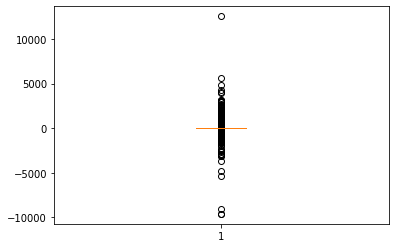

In [0]:
plt.boxplot(cleanecom.quantity)

(array([2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00,
        2.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
        2.00000e+00, 8.00000e+00, 7.00000e+00, 1.20000e+01, 8.00000e+00,
        2.10000e+01, 4.00000e+01, 4.05000e+02, 5.37326e+05, 3.06400e+03,
        4.06000e+02, 1.62000e+02, 6.20000e+01, 2.80000e+01, 2.80000e+01,
        8.00000e+00, 8.00000e+00, 9.00000e+00, 1.00000e+00, 5.00000e+00,
        2.00000e+00, 4.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00

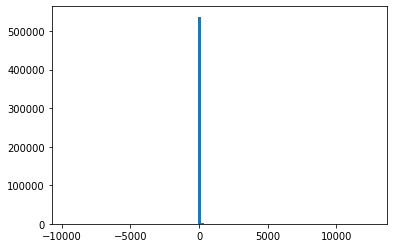

In [0]:
plt.hist(cleanecom.quantity,bins=100)